# 🧬 Exploração de Dados QIIME 2

Este notebook demonstra como carregar e explorar resultados do QIIME 2.

**Autor:** Projeto YARA - IFAM  
**Data:** Outubro 2025  
**Objetivo:** Prototipar análises que serão integradas ao bot

## 📦 1. Imports e Configurações

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import zipfile
import json

# Configurações de visualização
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
%matplotlib inline

# Tamanhos de figura padrão
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11

print("✅ Bibliotecas importadas com sucesso!")

✅ Bibliotecas importadas com sucesso!


## 📁 2. Estrutura de Arquivos QIIME 2

Arquivos típicos do QIIME 2:
- **`.qza`**: Artefatos QIIME (dados comprimidos)
- **`.qzv`**: Visualizações QIIME (contém dados + HTML)
- **`.tsv`**: Tabelas exportadas (texto simples)
- **`.biom`**: Formato BIOM (tabelas de OTU/ASV)

In [2]:
# Criar estrutura de diretórios se não existir
data_dir = Path("../data/qiime2")
data_dir.mkdir(parents=True, exist_ok=True)

print(f"📁 Diretório de dados: {data_dir.absolute()}")
print("\n💡 Coloque seus arquivos QIIME 2 neste diretório")

📁 Diretório de dados: /home/gf307/Documentos/pibic/yara/notebooks/../data/qiime2

💡 Coloque seus arquivos QIIME 2 neste diretório


## 🔧 3. Funções Auxiliares para Ler Arquivos QIIME 2

In [3]:
def extract_qzv(qzv_path, extract_to="temp_qzv"):
    """
    Extrai conteúdo de arquivo .qzv
    
    Args:
        qzv_path: Caminho para arquivo .qzv
        extract_to: Diretório temporário para extração
    
    Returns:
        Path do diretório extraído
    """
    extract_path = Path(extract_to)
    extract_path.mkdir(exist_ok=True)
    
    with zipfile.ZipFile(qzv_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
    
    print(f"✅ Arquivo {qzv_path} extraído para {extract_path}")
    return extract_path


def find_data_files(extract_path, extension=".tsv"):
    """
    Encontra arquivos de dados dentro do .qzv extraído
    
    Args:
        extract_path: Diretório extraído
        extension: Extensão do arquivo a buscar
    
    Returns:
        Lista de paths de arquivos encontrados
    """
    files = list(Path(extract_path).rglob(f"*{extension}"))
    print(f"📄 Encontrados {len(files)} arquivos {extension}")
    return files


def load_diversity_alpha(filepath):
    """
    Carrega arquivo TSV de diversidade alfa
    
    Args:
        filepath: Caminho para arquivo .tsv
    
    Returns:
        DataFrame pandas
    """
    df = pd.read_csv(filepath, sep='\t', index_col=0)
    print(f"✅ Carregadas {len(df)} amostras")
    print(f"📊 Colunas: {list(df.columns)}")
    return df


print("✅ Funções auxiliares definidas!")

✅ Funções auxiliares definidas!


## 📊 4. Exemplo: Dados Sintéticos

Vamos criar dados de exemplo para demonstrar as análises

In [4]:
# Criar dados sintéticos de exemplo
np.random.seed(42)

# Simular 20 amostras
n_samples = 20
sample_ids = [f"Amostra_{i+1}" for i in range(n_samples)]

# Grupos: Controle e Tratamento
grupos = ['Controle'] * 10 + ['Tratamento'] * 10

# Diversidade Alfa (Shannon)
# Controle: média 2.5, Tratamento: média 3.2
shannon_controle = np.random.normal(2.5, 0.3, 10)
shannon_tratamento = np.random.normal(3.2, 0.4, 10)
shannon = np.concatenate([shannon_controle, shannon_tratamento])

# Simpson
simpson_controle = np.random.normal(0.85, 0.05, 10)
simpson_tratamento = np.random.normal(0.92, 0.04, 10)
simpson = np.concatenate([simpson_controle, simpson_tratamento])

# Observed Features (riqueza)
observed_controle = np.random.randint(150, 250, 10)
observed_tratamento = np.random.randint(200, 350, 10)
observed = np.concatenate([observed_controle, observed_tratamento])

# Criar DataFrame
df_alpha = pd.DataFrame({
    'Sample_ID': sample_ids,
    'Grupo': grupos,
    'Shannon': shannon,
    'Simpson': simpson,
    'Observed_Features': observed
})

df_alpha.set_index('Sample_ID', inplace=True)

print("✅ Dados sintéticos criados!")
df_alpha.head(10)

✅ Dados sintéticos criados!


,Grupo,Shannon,Simpson,Observed_Features
Sample_ID,,,,
Amostra_1,Controle,2.649014,0.923282,212
Amostra_2,Controle,2.458521,0.838711,167
Amostra_3,Controle,2.694307,0.853376,239
Amostra_4,Controle,2.956909,0.778763,193
Amostra_5,Controle,2.429754,0.822781,183
Amostra_6,Controle,2.429759,0.855546,223
Amostra_7,Controle,2.973764,0.792450,211
Amostra_8,Controle,2.730230,0.868785,249
Amostra_9,Controle,2.359158,0.819968,163


## 📈 5. Estatísticas Descritivas

In [5]:
# Estatísticas gerais
print("📊 ESTATÍSTICAS DESCRITIVAS\n")
print(df_alpha.describe())

print("\n" + "="*60)
print("📊 ESTATÍSTICAS POR GRUPO\n")

for grupo in df_alpha['Grupo'].unique():
    print(f"\n{'='*60}")
    print(f"Grupo: {grupo}")
    print(f"{'='*60}")
    subset = df_alpha[df_alpha['Grupo'] == grupo]
    print(subset[['Shannon', 'Simpson', 'Observed_Features']].describe())

📊 ESTATÍSTICAS DESCRITIVAS

         Shannon    Simpson  Observed_Features
count  20.000000  20.000000          20.000000
mean    2.759078   0.873252         231.350000
std     0.286151   0.054955          41.381759
min     2.359158   0.778763         163.000000
25%     2.497155   0.837887         211.750000
50%     2.712268   0.867829         231.000000
75%     2.974094   0.920416         247.500000
max     3.325699   0.994091         323.000000

📊 ESTATÍSTICAS POR GRUPO


Grupo: Controle
         Shannon    Simpson  Observed_Features
count  10.000000  10.000000          10.000000
mean    2.634418   0.838908         208.400000
std     0.216903   0.040695          31.166934
min     2.359158   0.778763         163.000000
25%     2.436949   0.820671         185.500000
50%     2.655891   0.837063         211.500000
75%     2.721249   0.855004         235.000000
max     2.973764   0.923282         249.000000

Grupo: Tratamento
         Shannon    Simpson  Observed_Features
count  10.000000

## 📊 6. Visualizações Básicas

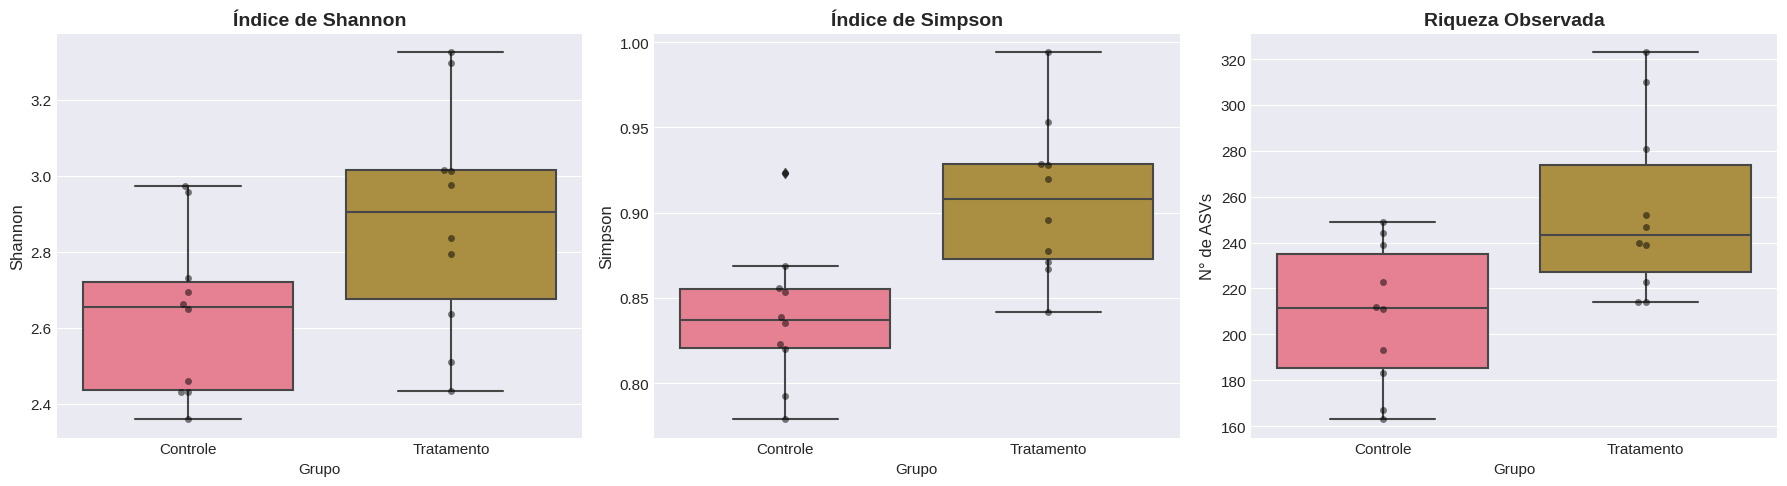

✅ Gráficos salvos em data/qiime2/


In [6]:
# Distribuição de Shannon por grupo
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Shannon
sns.boxplot(data=df_alpha, x='Grupo', y='Shannon', ax=axes[0])
sns.swarmplot(data=df_alpha, x='Grupo', y='Shannon', color='black', alpha=0.5, ax=axes[0])
axes[0].set_title('Índice de Shannon', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Shannon', fontsize=12)

# Simpson
sns.boxplot(data=df_alpha, x='Grupo', y='Simpson', ax=axes[1])
sns.swarmplot(data=df_alpha, x='Grupo', y='Simpson', color='black', alpha=0.5, ax=axes[1])
axes[1].set_title('Índice de Simpson', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Simpson', fontsize=12)

# Observed Features
sns.boxplot(data=df_alpha, x='Grupo', y='Observed_Features', ax=axes[2])
sns.swarmplot(data=df_alpha, x='Grupo', y='Observed_Features', color='black', alpha=0.5, ax=axes[2])
axes[2].set_title('Riqueza Observada', fontsize=14, fontweight='bold')
axes[2].set_ylabel('N° de ASVs', fontsize=12)

plt.tight_layout()
plt.savefig('../data/qiime2/diversidade_alfa_comparacao.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Gráficos salvos em data/qiime2/")

## 🧪 7. Testes Estatísticos

In [7]:
from scipy import stats

# Teste Mann-Whitney U (não-paramétrico)
controle = df_alpha[df_alpha['Grupo'] == 'Controle']
tratamento = df_alpha[df_alpha['Grupo'] == 'Tratamento']

print("🧪 TESTES ESTATÍSTICOS (Mann-Whitney U)\n")
print("="*60)

metricas = ['Shannon', 'Simpson', 'Observed_Features']

for metrica in metricas:
    stat, pvalue = stats.mannwhitneyu(
        controle[metrica],
        tratamento[metrica]
    )
    
    print(f"\n{metrica}:")
    print(f"  Estatística U: {stat:.2f}")
    print(f"  P-valor: {pvalue:.4f}")
    
    if pvalue < 0.05:
        print(f"  ✅ Diferença SIGNIFICATIVA (p < 0.05)")
    else:
        print(f"  ❌ Sem diferença significativa (p >= 0.05)")
    
    # Tamanho do efeito
    mean_controle = controle[metrica].mean()
    mean_tratamento = tratamento[metrica].mean()
    diferenca_pct = ((mean_tratamento - mean_controle) / mean_controle) * 100
    print(f"  📊 Diferença: {diferenca_pct:+.1f}%")

🧪 TESTES ESTATÍSTICOS (Mann-Whitney U)


Shannon:
  Estatística U: 23.00
  P-valor: 0.0452
  ✅ Diferença SIGNIFICATIVA (p < 0.05)
  📊 Diferença: +9.5%

Simpson:
  Estatística U: 10.00
  P-valor: 0.0028
  ✅ Diferença SIGNIFICATIVA (p < 0.05)
  📊 Diferença: +8.2%

Observed_Features:
  Estatística U: 17.00
  P-valor: 0.0139
  ✅ Diferença SIGNIFICATIVA (p < 0.05)
  📊 Diferença: +22.0%


## 💾 8. Salvar Dados Processados

In [8]:
# Salvar DataFrame processado
output_file = '../data/qiime2/diversidade_alfa_processada.tsv'
df_alpha.to_csv(output_file, sep='\t')

print(f"✅ Dados salvos em: {output_file}")

# Salvar estatísticas resumidas
summary = df_alpha.groupby('Grupo')[['Shannon', 'Simpson', 'Observed_Features']].agg(['mean', 'std', 'min', 'max'])
summary.to_csv('../data/qiime2/estatisticas_resumo.tsv', sep='\t')

print("✅ Estatísticas resumidas salvas!")

✅ Dados salvos em: ../data/qiime2/diversidade_alfa_processada.tsv
✅ Estatísticas resumidas salvas!


## 🎯 9. Resumo e Próximos Passos

### ✅ O que fizemos:
1. Criamos funções para ler arquivos QIIME 2
2. Geramos dados sintéticos de exemplo
3. Calculamos estatísticas descritivas
4. Criamos visualizações comparativas
5. Realizamos testes estatísticos

### 📋 Próximos passos:
1. Adaptar para seus dados reais do QIIME 2
2. Integrar com o bot YARA
3. Automatizar geração de relatórios
4. Adicionar mais análises (Beta diversidade, Taxonomia)

In [9]:
print("🎉 Análise concluída!")
print("\n📚 Documentação QIIME 2: https://docs.qiime2.org/")
print("💬 Para integrar ao YARA, veja: actions/actions.py")

🎉 Análise concluída!

📚 Documentação QIIME 2: https://docs.qiime2.org/
💬 Para integrar ao YARA, veja: actions/actions.py
